# Q2 Rush Hour Rush: A race against time and distance (15 Marks)
## Trip Patterns Over Time and Distance
**Description:** Analyze taxi trip data to understand variations in trip frequency by time, distance, and seasonal patterns. You will need to interpret these visualizations in relation to time-based trends and how they impact taxi usage.

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData.csv')

### 2.a Trip Frequency by Time of Day, Month, and Day (3 Marks):
(a) Create bar charts to visualize trip distributions for:

• Hours of the Day (to capture daily patterns and peak hours)

• Days of the Week (to identify weekday vs. weekend patterns)

• Months of the Year (to see seasonal trends, if any)

(b) Describe notable patterns, like peak hours, high-demand days and peak months. Discuss how these patterns could be relevant for managing taxi demand.

### 2.b Peak Hours and Distance Analysis (3 Marks):

(a) Identify Peak Hours: Create a heatmap showing trip frequency by the hour to identify the busiest hours for taxi trips.

(b) Distance Analysis: Use a histogram to analyze the distribution of trip distances during peak hours.

(c) Interpretation: Discuss how peak hours combined with distance trends might affect taxi service efficiency (e.g., congestion, longer wait times).

### 2.c Trip Duration and Distance Distribution (3 Marks):

(a) Plot histograms for trip duration and trip distance to display their distributions. What can you infer from each histogram?

(b) Correlation Analysis: Use a scatter plot to show the relationship between trip duration and distance.

(c) Interpretation: Comment on any noticeable outliers or trends, especially patterns that could influence route planning.

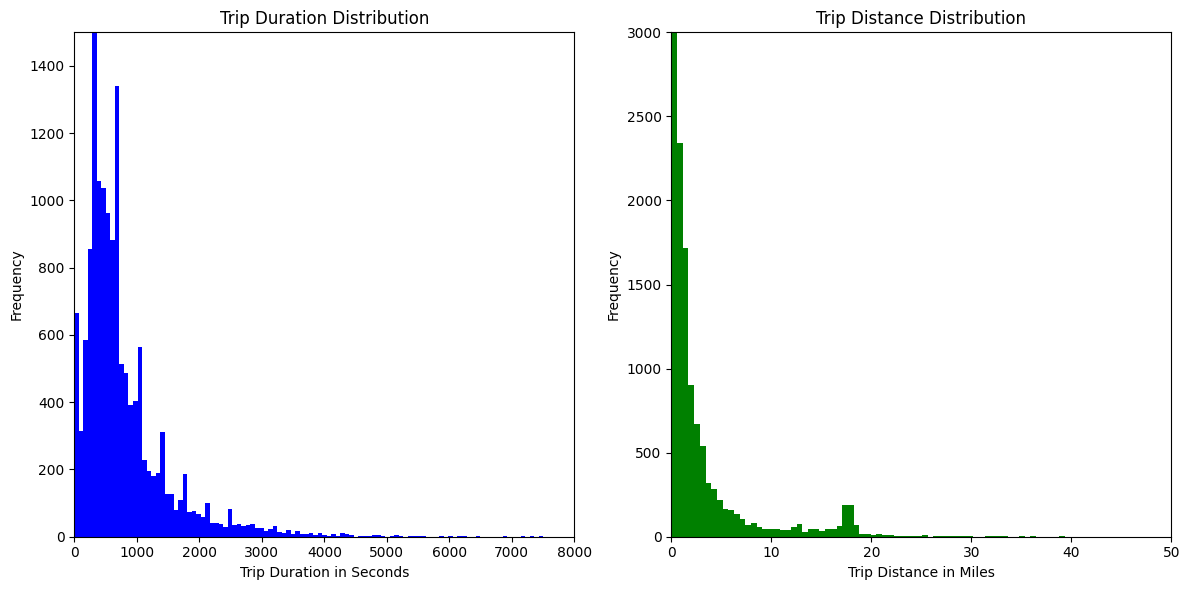

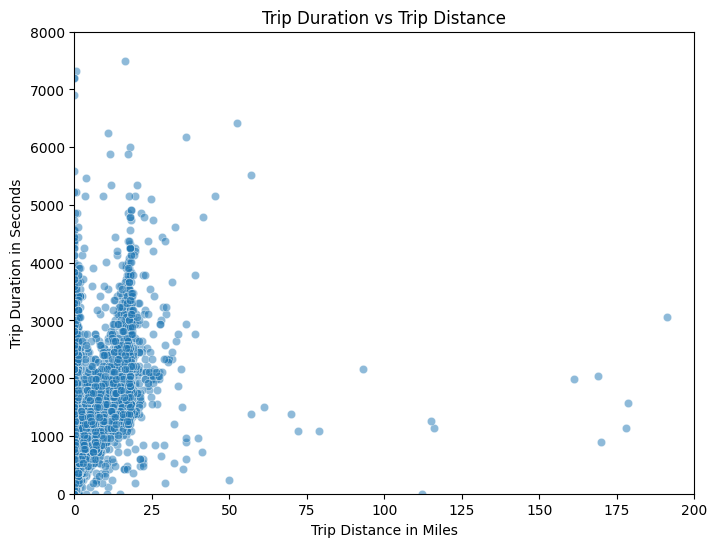

Correlation between trip duration and trip distance: 0.16


In [28]:
df.dropna(subset=['trip_seconds', 'trip_miles'], inplace=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['trip_seconds'], bins=1000, color='blue')
plt.xlim(0, 8000)
plt.ylim(0, 1500)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(df['trip_miles'], bins=3000, color='green')
plt.xlim(0, 50)
plt.ylim(0, 3000)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance in Miles')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='trip_miles', y='trip_seconds', data=df, alpha=0.5)
# outliers were noticable in the scatter plot, so I limited the x and y axis to get a better view
plt.xlim(0, 200)
plt.ylim(0, 8000)
plt.title('Trip Duration vs Trip Distance')
plt.xlabel('Trip Distance in Miles')
plt.ylabel('Trip Duration in Seconds')
plt.show()

correlation = df['trip_seconds'].corr(df['trip_miles'])
print(f"Correlation between trip duration and trip distance: {correlation:.2f}")

### 2.d Seasonal Trends in Taxi Usage and Distance (3 Marks):

(a) Use line charts to track the number of trips and average trip distance across months to identify seasonal peaks and lows.

(b) Interpretation: Explain how these trends could influence resource allocation during high-demand periods (e.g., holiday season).


### 2.e Distance vs. Time of Day (3 Marks):

(a) Plot the variation in trip distances across hours of the day to capture typical distance trends for peak and non-peak hours.

(b) Interpretation: Explain your findings, including any insights into typical distance trends during peak and non-peak hours.


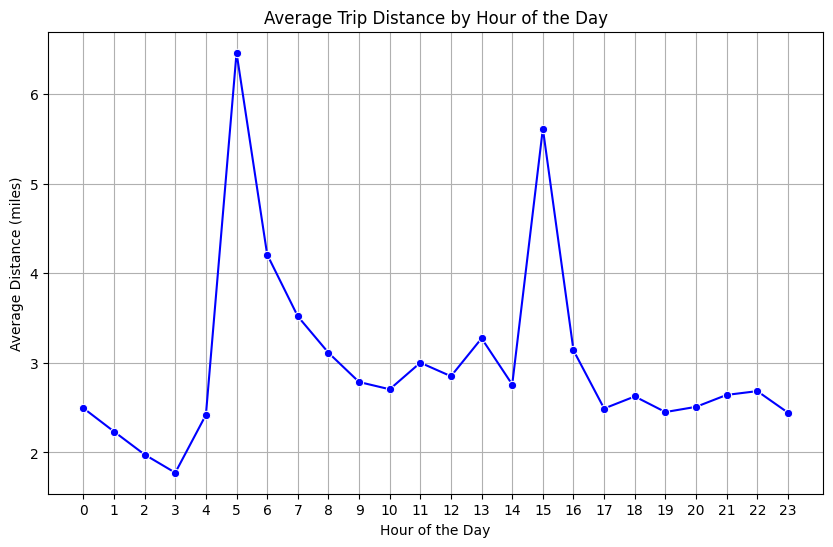

Average distance per hour: trip_start_hour
0     2.494668
1     2.233033
2     1.975670
3     1.773253
4     2.419492
5     6.464476
6     4.209896
7     3.519834
8     3.113340
9     2.786491
10    2.705190
11    3.002220
12    2.850899
13    3.274427
14    2.758517
15    5.616953
16    3.139554
17    2.490483
18    2.625292
19    2.450881
20    2.509048
21    2.642363
22    2.684689
23    2.444317
Name: trip_miles, dtype: float64
Standard deviation of distances per hour: trip_start_hour
0      4.327501
1      3.585875
2      3.774965
3      3.324662
4      4.463385
5     17.884993
6      6.161430
7      7.265401
8      8.714133
9     10.837683
10     4.974011
11     5.546100
12     6.703532
13     8.890069
14     5.090148
15    64.015284
16     5.791869
17     4.434106
18     4.908591
19     4.342959
20     5.017843
21     5.896458
22     4.421030
23     5.456988
Name: trip_miles, dtype: float64


In [32]:
hourly_distance = df.groupby('trip_start_hour')['trip_miles'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_distance.index, y=hourly_distance.values, marker='o', color='b')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Distance (miles)')
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid(True)
plt.show()


hourly_distance_std = df.groupby('trip_start_hour')['trip_miles'].std()
print("Average distance per hour:", hourly_distance)
print("Standard deviation of distances per hour:", hourly_distance_std)